# Numerics

## Trapezoidal Rule

In [4]:
function T = TrapezoidalRule(f,a,b,n)
% TRAPEZOIDALRULE computes the integral of f by subdividing the
% interval [a,b] into n intervals using the trapezoidal rule.
    x = linspace(a,b,n+1);
    T = feval(f,a) + feval(f,b);
    for i=1:n-1
        T = T + 2*feval(f,x(i+1));
    end
    T = (b-a)*T/(2*n);
end


In [6]:
format long
f = @(x) [exp(-x*x)];
a = [32,64,128,256,512,1024, 30000];
for i = a
    format long
    printf('TrapezoidalRule for n=%i \t intervall = %0.15e\n',i, TrapezoidalRule(f,-1,2,i))
endfor

using_quad = quad(f, -1,2)

TrapezoidalRule for n=32 	 intervall = 1.628312899375075e+00
TrapezoidalRule for n=64 	 intervall = 1.628757382371713e+00
TrapezoidalRule for n=128 	 intervall = 1.628868489202797e+00
TrapezoidalRule for n=256 	 intervall = 1.628896265039894e+00
TrapezoidalRule for n=512 	 intervall = 1.628903208944738e+00
TrapezoidalRule for n=1024 	 intervall = 1.628904944917545e+00
TrapezoidalRule for n=30000 	 intervall = 1.628905522900666e+00
using_quad =  1.628905523574849


## Simpsons Rule

In [5]:
function S = SimpsonsRule(f,a,b,n)
% SIMPSONSRULE computes the integral of f by subdividing the
% interval [a,b] into an even number n of intervals using
% Simpson's rule.
    x = linspace(a,b,n+1);
    S = feval(f,a) + feval(f,b);
    for i=2:2:n
        S = S + 4*feval(f,x(i));
    end
    for i=3:2:n-1
        S = S + 2*feval(f,x(i));
    end
    S = (b-a)*S/(3*n);
end

In [9]:
format long
f = @(x) [sin(x)];
a = [2,4,32,64,128,238,256,512,1024];
for i = a
    format long
    printf('Simpsons-Rule  for n=%i \t intervall = %0.15e\n',i, SimpsonsRule(f,0,pi,i))
endfor

using_quad = quad(f,-1,2)

Simpsons-Rule  for n=2 	 intervall = 2.094395102393195e+00
Simpsons-Rule  for n=4 	 intervall = 2.004559754984421e+00
Simpsons-Rule  for n=32 	 intervall = 2.000001033369413e+00
Simpsons-Rule  for n=64 	 intervall = 2.000000064530001e+00
Simpsons-Rule  for n=128 	 intervall = 2.000000004032258e+00
Simpsons-Rule  for n=238 	 intervall = 2.000000000337331e+00
Simpsons-Rule  for n=256 	 intervall = 2.000000000252003e+00
Simpsons-Rule  for n=512 	 intervall = 2.000000000015753e+00
Simpsons-Rule  for n=1024 	 intervall = 2.000000000000981e+00
using_quad =    9.564491424152821e-01


## Natural cubic spline

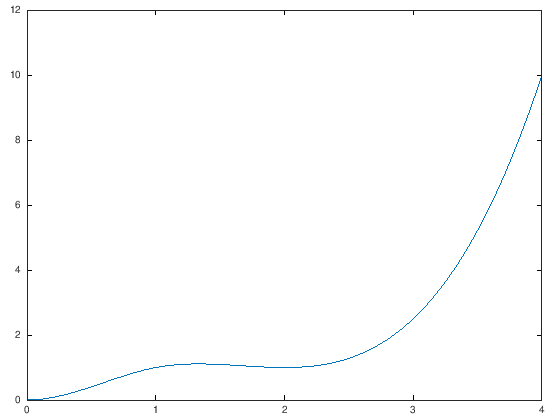

In [2]:
X = [0 1 2];
Y = [0 1 1];
x = linspace(0, 4, 100);
plot(x, ppval(spline(X,[0 Y 0]),x))

## Trigonometric functions

In [41]:
A = [1 1 1 1; 1 -i -1 i; 1 -1 1 -1; 1 i -1 -i]
b = [8; 6; 4; 2]
A\b


A =

   1 + 0i   1 + 0i   1 + 0i   1 + 0i
   1 + 0i  -0 - 1i  -1 + 0i   0 + 1i
   1 + 0i  -1 + 0i   1 + 0i  -1 + 0i
   1 + 0i   0 + 1i  -1 + 0i  -0 - 1i

b =

   8
   6
   4
   2

ans =

   5 + 0i
   1 + 1i
   1 + 0i
   1 - 1i



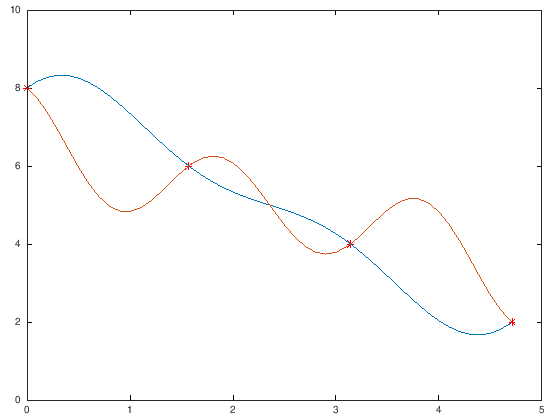

In [40]:
f = 5+(1-i)*exp(i*x)+exp(2*i*x)+(1+i)*exp(3*i*x);
f_real = 5 + 2*cos(x)+2*sin(x)+cos(2*x);
x = 0:0.1:4.7;
a = [0 pi/2 pi 3*pi/2];
b = [8 6 4 2];

plot (a, b, 'r*', x, f_real, x, f);


## FFT mit $N = 4$

In [1]:
f = [2 4 6 8]';
fft(f)

ans =

   20 +  0i
   -4 +  4i
   -4 +  0i
   -4 -  4i



## Circular Convolution

In [2]:
% O(n^2)
function f = circularconv(x,y)

    % get lenght of input
    len = size(x,1);

    for n = 1:len
        sum = 0;
        for k = 1:len
            % get the new position using modulo 
            m = mod(n-k,len);
            % calculate the sum of every element
            sum += x(k)*y(m+1);
        end
        f(n) = sum;
    end
end

In [3]:
x = [1; 2; 4; 5; 6];
y = [7; 8; 9; 3; 0];

f = circularconv(x,y)

f =

   112    91    71    88   124

